In [39]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [54]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
pip install --upgrade matplotlib

    100% |████████████████████████████████| 14.3MB 1.0MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 7.2MB/s eta 0:00:01
    100% |████████████████████████████████| 122kB 8.7MB/s eta 0:00:01
You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


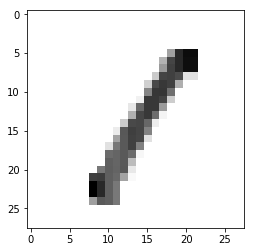

1


In [55]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3],cmap=plt.cm.binary)

plt.show()
print(y_train[3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

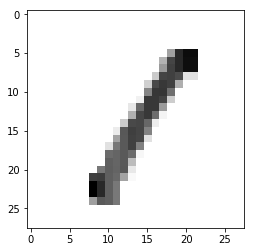

In [56]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[3])

plt.imshow(x_train[3],cmap=plt.cm.binary)
plt.show()

# A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model. No going backwards.

Now, we'll pop in layers. Recall our neural network image? Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

In [57]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

# we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. 
This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. Just like our image.

In [58]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# This layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start.
This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. Great, our model is done.
Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.

In [59]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Remember why we picked relu as an activation function? Same thing is true for the Adam optimizer. It's just a great default to start with.


In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model Now Fit
A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.


In [61]:
model.fit(x_train, y_train, epochs=3)
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2659 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1084 - acc: 0.9670
Epoch 3/3
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0874 - acc: 0.9735
0.0873668703502044
0.9735


In [62]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

[[6.1808532e-09 1.9234882e-08 1.7528541e-07 ... 9.9999440e-01
  4.1788013e-09 2.8753220e-06]
 [3.0087077e-10 2.2670458e-04 9.9976641e-01 ... 7.9995868e-09
  1.3516745e-07 6.8420812e-13]
 [8.6087304e-08 9.9979442e-01 1.8711591e-05 ... 1.6518890e-05
  1.4055030e-04 2.1966221e-06]
 ...
 [2.6634264e-10 1.3386773e-05 4.2536804e-08 ... 6.8762056e-05
  1.4500791e-05 5.0337080e-06]
 [1.4355449e-05 4.6657101e-07 2.3978959e-07 ... 1.2049119e-06
  7.7280565e-03 2.9087419e-08]
 [7.0761484e-07 2.0913099e-06 3.6657732e-06 ... 1.4932031e-09
  3.9041848e-07 2.8947906e-07]]


1


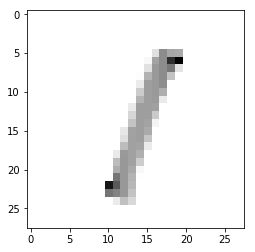

In [64]:
import numpy as np

print(np.argmax(predictions[5]))
plt.imshow(x_test[5],cmap=plt.cm.binary)
plt.show()